In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [44]:
predictions = pd.read_pickle('/home/robbe/IM2DeepMulti/preds/Test-Test-2024-03-27_10-16-48.pkl')

In [45]:
predictions

,Modified sequence,charge,CCS,seq,modifications,tr,predicted_CCS1,predicted_CCS2
82106,PVLIGNEPSLGVSQPTR,2,"[457.18969314645796, 457.18969314645796]",PVLIGNEPSLGVSQPTR,Not modified,0,463.625977,460.956726
102482,TSLSALTQLMK,2,"[379.9663878902057, 379.9663878902057]",TSLSALTQLMK,Not modified,0,384.274811,385.207397
114193,VYVVGTAHFSDDSKR,2,"[480.8735243682505, 480.8735243682505]",VYVVGTAHFSDDSKR,Not modified,0,467.401489,468.264893
74555,MVAFNNQIDHEVTVEK,3,"[527.8353807519355, 527.8353807519355]",MVAFNNQIDHEVTVEK,Not modified,0,527.330383,527.806824
15536,DLNSQADSLMTSSAFDTSQVK,3,"[619.7340366020704, 619.7340366020704]",DLNSQADSLMTSSAFDTSQVK,Not modified,0,621.135681,617.169983
...,...,...,...,...,...,...,...,...
66097,LQALLEAR,2,"[339.78556179968376, 339.78556179968376]",LQALLEAR,Not modified,0,344.718597,346.034912
35274,GGNTLTGM(ox)ALNFIR,2,"[424.23402910409203, 424.23402910409203]",GGNTLTGMALNFIR,8|Oxidation,0,421.803101,422.205536
15703,DLSTLLTM(ox)FGLPQ,2,"[417.0452180440549, 417.0452180440549]",DLSTLLTMFGLPQ,8|Oxidation,0,415.119537,415.740723
115462,YAEDIFGELFTQANTFASR,3,"[565.4967498397461, 565.4967498397461]",YAEDIFGELFTQANTFASR,Not modified,0,561.656189,564.406555


In [46]:
predictions[['CCS1','CCS2']] = predictions['CCS'].apply(pd.Series)

In [47]:
predictions['DeltaCCS'] = predictions['CCS2'] - predictions['CCS1']
predictions['DeltaPred'] = predictions['predicted_CCS2'] - predictions['predicted_CCS1']

<Axes: ylabel='Frequency'>

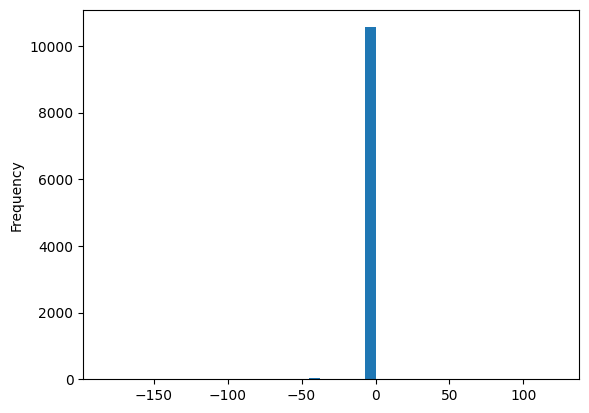

In [48]:
predictions['DeltaCCS'].plot(kind='hist', bins=40)

<Axes: ylabel='Frequency'>

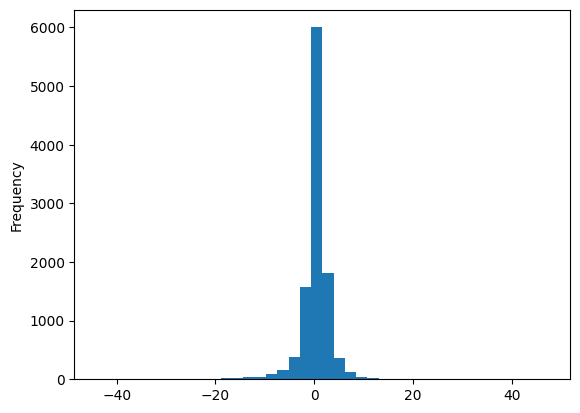

In [49]:
predictions['DeltaPred'].plot(kind='hist', bins=40)

In [50]:
predictions.sort_values('DeltaCCS', ascending=False)

,Modified sequence,charge,CCS,seq,modifications,tr,predicted_CCS1,predicted_CCS2,CCS1,CCS2,DeltaCCS,DeltaPred
116767,YGPQYGHPPPPPPPPEYGPHADSPVLMVYGLDQSK,4,"[811.1264431745549, 933.6029773436916]",YGPQYGHPPPPPPPPEYGPHADSPVLMVYGLDQSK,Not modified,0,811.637024,787.746277,811.126443,933.602977,122.476534,-23.890747
53552,KIEPELDGSAQVTSHDASTNGLINFIK,3,"[647.7159839986216, 757.9648882319004]",KIEPELDGSAQVTSHDASTNGLINFIK,Not modified,0,648.632080,655.284851,647.715984,757.964888,110.248904,6.652771
13607,DGAGFLINLIDSPGHVDFSSEVTAALR,3,"[632.7156900512227, 728.24475430093]",DGAGFLINLIDSPGHVDFSSEVTAALR,Not modified,0,638.077332,628.532898,632.715690,728.244754,95.529064,-9.544434
108742,VLELSIPASAEQIQHLAGAIAER,3,"[593.4120276851759, 688.5459960283339]",VLELSIPASAEQIQHLAGAIAER,Not modified,0,624.168335,620.988586,593.412028,688.545996,95.133968,-3.179749
70012,LVQAFQYTDEHGEVCPAGWKPGSDTIKPNVDDSK,4,"[813.6365988154452, 904.3487846772875]",LVQAFQYTDEHGEVCPAGWKPGSDTIKPNVDDSK,15|Carbamidomethyl,0,875.135315,886.393860,813.636599,904.348785,90.712186,11.258545
...,...,...,...,...,...,...,...,...,...,...,...,...
53176,KGDVVHCWYTGTLQDGTVFDTNIQTSAK,4,"[858.4472675462089, 739.2269396209288]",KGDVVHCWYTGTLQDGTVFDTNIQTSAK,7|Carbamidomethyl,0,823.495056,835.294006,858.447268,739.226940,-119.220328,11.798950
22086,EILGTAQSVGCNVDGR,2,"[441.74618795230055, 320.8026599220637]",EILGTAQSVGCNVDGR,11|Carbamidomethyl,0,437.013794,437.375977,441.746188,320.802660,-120.943528,0.362183
88400,RTGPAATTLPDGAAAESLVESSEVAVIGFFK,3,"[806.8355111663823, 671.280571685886]",RTGPAATTLPDGAAAESLVESSEVAVIGFFK,Not modified,0,646.658081,657.729187,806.835511,671.280572,-135.554939,11.071106
53760,KLADQCTGLQGFLVFHSFGGGTGSGFTSLLMER,4,"[923.5048536419375, 753.1256969481143]",KLADQCTGLQGFLVFHSFGGGTGSGFTSLLMER,6|Carbamidomethyl,0,873.941956,867.303223,923.504854,753.125697,-170.379157,-6.638733


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


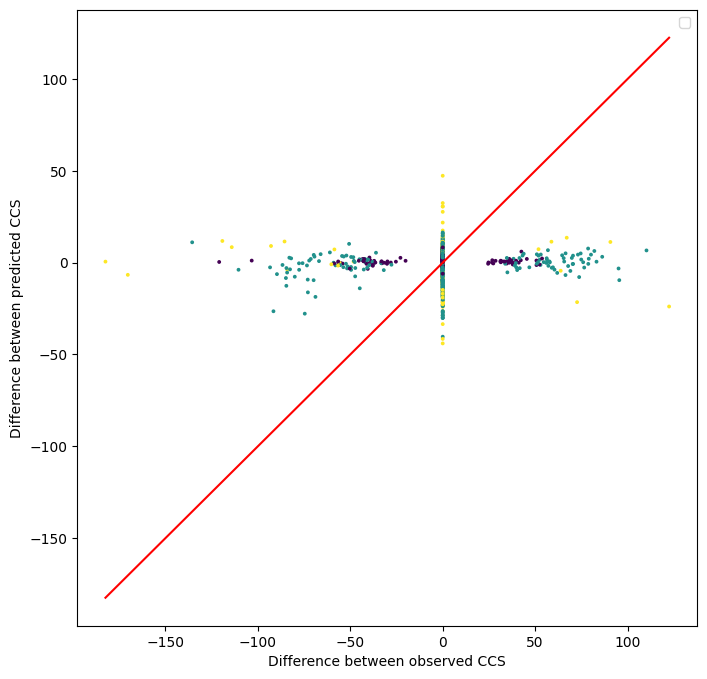

In [54]:
# Scatter plot of DeltaCCS vs DeltaPred
fig = plt.figure(figsize=(8,8))
plt.scatter(predictions['DeltaCCS'], predictions['DeltaPred'], s=3, c=predictions['charge'])
plt.plot([min(predictions['DeltaCCS']), max(predictions['DeltaCCS'])], [min(predictions['DeltaCCS']), max(predictions['DeltaCCS'])], color="red")
plt.xlabel('Difference between observed CCS')
plt.ylabel('Difference between predicted CCS')
plt.legend()
